In [1]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '../../'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import plot_time_series, plot_stack_bar, print_latex_table

In [3]:
from pylab import *

cmap = cm.get_cmap('Pastel1', 4)    # PiYG
colors=[]
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/dell/gcloud_credentials/original-folio-296420-c6835ebfbfe7.json'

In [5]:
df =pd.read_parquet('gs://pacto-report-women/ieer_women/000000000000.parquet')

In [6]:
df['ieer_ponderado'] = df.iloc[:,1:].mean(axis=1)

In [7]:
df=df.sort_values('ano').set_index('ano')

In [8]:
df.columns= ['Não-Liderança','Gerência','Diretoria', 'Ponderado']

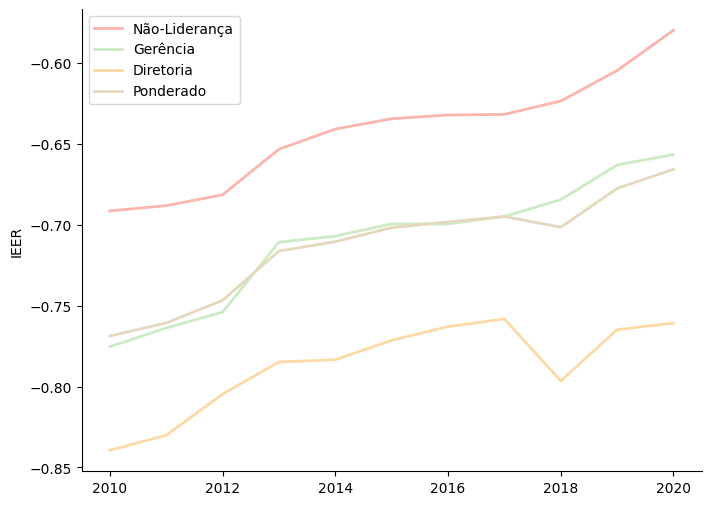

In [9]:
plot_time_series(data=df, 
                 ylabel='IEER',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/ieer_black_women.pdf')

In [10]:
df = pd.read_parquet('gs://pacto-report-women/wage_gap/000000000000.parquet')
df=df.sort_values('ano').set_index('ano')
df = df.div(df['Homem_Branca'], axis=0)

df.drop(['Homem_Indigena', 'Mulher_Indigena'], axis=1, inplace=True)

df.columns = ['Homem Negro', 'Mulher Branca', 'Mulher Negra', 'Homem Branco']

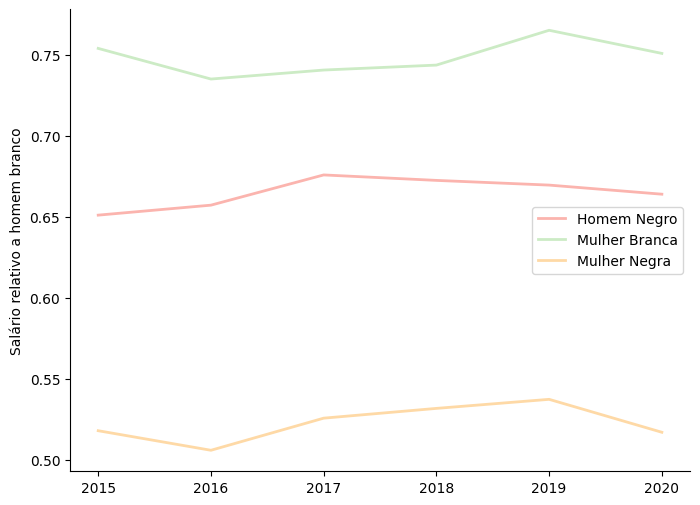

In [11]:
plot_time_series(data=df.iloc[:,:-1], 
                 ylabel='Salário relativo a homem branco',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/wage_gap.pdf')

In [12]:
df=pd.read_parquet('gs://pacto-report-women/supply_gap/000000000000.parquet')
df=df.sort_values('ano').set_index('ano')

df = df.div(df['Homem_Branca'], axis=0)

df.drop(['Homem_Indigena', 'Mulher_Indigena'], axis=1, inplace=True)

df.columns = ['Homem Negro', 'Mulher Branca', 'Mulher Negra', 'Homem Branco']

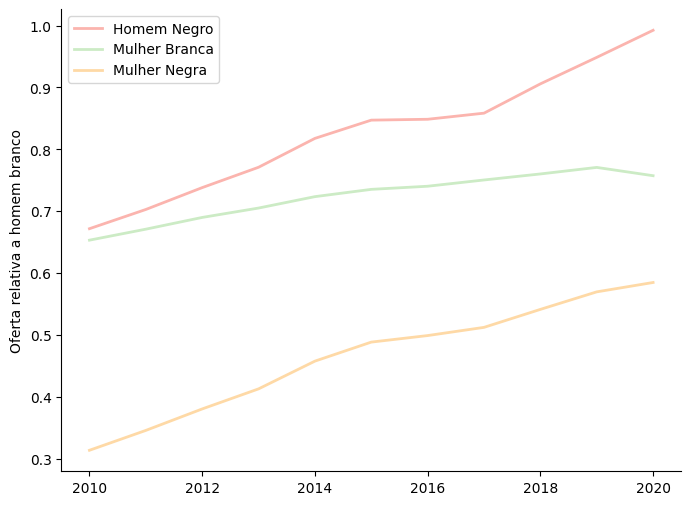

In [13]:
plot_time_series(data=df.iloc[:,:-1], 
                 ylabel='Oferta relativa a homem branco',
                 save_path='/home/dell/Documents/pacto/reports/black_women/figures/supply_gap.pdf')

In [14]:
df=pd.read_parquet('gs://pacto-report-women/education_groups/000000000000.parquet')

# plot_stack_bar(data=df,
#                x='ano',
#                  save_path='/home/dell/Documents/pacto/reports/black_women/figures/education_all_groups.pdf')

df['fundamental'] = df[['primario_completo', 'fundamental_completo', 
                        'primario_incompleto', 'fundamental_incompleto', 'analfabeto']].sum(axis=1)
df.drop(['primario_completo', 'fundamental_completo', 
                        'primario_incompleto', 'fundamental_incompleto', 'analfabeto'], axis=1, inplace=True)
df['medio']=df[['medio_completo','medio_incompleto']].sum(axis=1)
df.drop(['medio_completo','medio_incompleto'], axis=1, inplace=True)
df['superior'] = df[['superior_completo', 'superior_incompleto','mestrado','doutorado']].sum(axis=1)
df.drop(['superior_completo', 'superior_incompleto','mestrado','doutorado'],axis=1, inplace=True)

df.columns = ['ano', 'Até Fundamental','Ensino Médio','Superior+']

tab1=df.copy()

print_latex_table(df.set_index('ano'),
                 save_path='/home/dell/Documents/pacto/reports/black_women/tables/education_women.tex',
                 caption='Composição educacional da oferta de trabalho de mulheres negras - 2010-2020')

\begin{tabular}{lrrr}
\toprule
{} &  Até Fundamental &  Ensino Médio &  Superior+ \\
ano  &                  &               &            \\
\midrule
2010 &            23.9\% &         63.1\% &      13.0\% \\
2011 &            22.4\% &         64.5\% &      13.1\% \\
2012 &            21.3\% &         65.3\% &      13.4\% \\
2013 &            20.2\% &         65.9\% &      14.0\% \\
2014 &            18.5\% &         66.5\% &      15.0\% \\
2015 &            17.7\% &         66.6\% &      15.8\% \\
2016 &            16.3\% &         66.0\% &      17.7\% \\
2017 &            15.0\% &         66.3\% &      18.7\% \\
2018 &            14.0\% &         65.8\% &      20.1\% \\
2019 &            13.2\% &         66.4\% &      20.4\% \\
2020 &            12.4\% &         66.8\% &      20.8\% \\
\bottomrule
\end{tabular}



In [15]:
df=pd.read_parquet('gs://pacto-report-women/education_groups_men/000000000000.parquet')

df['fundamental'] = df[['primario_completo', 'fundamental_completo', 
                        'primario_incompleto', 'fundamental_incompleto', 'analfabeto']].sum(axis=1)
df.drop(['primario_completo', 'fundamental_completo', 
                        'primario_incompleto', 'fundamental_incompleto', 'analfabeto'], axis=1, inplace=True)
df['medio']=df[['medio_completo','medio_incompleto']].sum(axis=1)
df.drop(['medio_completo','medio_incompleto'], axis=1, inplace=True)
df['superior'] = df[['superior_completo', 'superior_incompleto','mestrado','doutorado']].sum(axis=1)
df.drop(['superior_completo', 'superior_incompleto','mestrado','doutorado'],axis=1, inplace=True)

df.columns = ['ano', 'Até Fundamental','Ensino Médio','Superior+']

tab2=df.copy()

print_latex_table(df.set_index('ano'),
                 save_path='/home/dell/Documents/pacto/reports/black_women/tables/education_men.tex',
                 caption='Composição educacional da oferta de trabalho de mulheres negras - 2010-2020')

\begin{tabular}{lrrr}
\toprule
{} &  Até Fundamental &  Ensino Médio &  Superior+ \\
ano  &                  &               &            \\
\midrule
2010 &            45.8\% &         48.5\% &       5.7\% \\
2011 &            43.3\% &         50.8\% &       5.9\% \\
2012 &            40.9\% &         52.6\% &       6.5\% \\
2013 &            38.6\% &         54.6\% &       6.8\% \\
2014 &            36.1\% &         56.5\% &       7.5\% \\
2015 &            33.9\% &         58.3\% &       7.8\% \\
2016 &            31.5\% &         59.3\% &       9.2\% \\
2017 &            29.3\% &         61.2\% &       9.6\% \\
2018 &            28.0\% &         62.0\% &      10.0\% \\
2019 &            26.8\% &         63.2\% &      10.0\% \\
2020 &            25.7\% &         64.2\% &      10.1\% \\
\bottomrule
\end{tabular}



In [16]:
dfs=[]
for tab in [tab1,tab2]:
    tab.set_index('ano', inplace=True)
    cols=tab.columns
    tab=tab[cols].div(tab[cols].sum(axis=1), axis=0).multiply(100)
    tab=tab.round(1)
    dfs.append(tab)

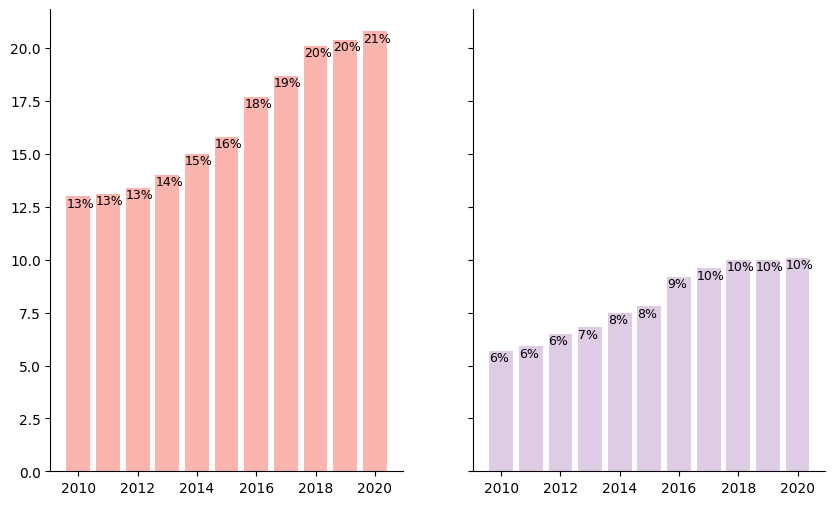

In [17]:
fig, axs=plt.subplots(1,2, figsize=(10,6), sharey=True)

for i,ax in enumerate(axs):
    ax.bar(dfs[i].index, dfs[i]['Superior+'], color=colors[i])
    # remove top and right spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    # add labels on top of even bars. Labels should be formatted as percentage
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x(), p.get_height()-0.5), fontsize=9)
            
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/rais_schooling.pdf', bbox_inches='tight')
            
plt.show()

In [18]:
# plot_stack_bar(data=df,
#                x='ano',
#                  save_path='/home/dell/Documents/pacto/reports/black_women/figures/education_main_groups.pdf')

In [80]:
df=pd.read_parquet('gs://pacto-report-women/setor_superior/000000000000.parquet')

In [81]:
top5 = df.groupby('subsetor_ibge').first()[['mean_wage']].sort_values('mean_wage', ascending=False).iloc[:5,:].index.to_list()

In [82]:
bottom5 = df.groupby('subsetor_ibge').first()[['mean_wage']].sort_values('mean_wage', ascending=False).iloc[-5:,:].index.to_list()

In [83]:
df = pd.pivot_table(data=df, index='subsetor_ibge', columns=['pop_group'], values='total')

In [84]:
df=df.div(df.sum(axis=0)).apply(lambda x: round(100*x,1))

In [85]:
df = df.reset_index()
tab1=df[[df.subsetor_ibge[k] in top5 for k in range(len(df))]]
tab2=df[[df.subsetor_ibge[k] in bottom5 for k in range(len(df))]]

In [93]:
tab1.set_index('subsetor_ibge', drop=True).reindex(top5)

pop_group,Homem-Branca,Homem-Negro,Mulher-Branca,Mulher-Negro
subsetor_ibge,,,,
Extrativa mineral,0.9,1.4,0.3,0.4
Serviços industriais de utilidade pública,2.0,1.8,0.8,0.7
"Ind. química de produtos farmacêuticos, veterinários, perfumaria",3.7,2.6,2.3,1.4
Indústria do material de transporte,2.6,1.1,0.7,0.3
"Instituiçoes de crédito, seguros e capitalizaçao",10.4,7.2,9.2,5.7


In [94]:
tab2.set_index('subsetor_ibge', drop=True).reindex(bottom5)

pop_group,Homem-Branca,Homem-Negro,Mulher-Branca,Mulher-Negro
subsetor_ibge,,,,
Indústria têxtil do vestuário e artefatos de tecidos,0.6,0.4,0.8,0.5
"Serv. de alojamento, alimentaçao, reparaçao, manutençao, redaçao",5.6,7.1,8.0,9.3
Comércio varejista,7.2,8.7,8.6,9.9
Administraçao pública direta e autárquica,3.7,4.0,8.3,7.9
Ensino,10.8,11.0,17.2,17.3


In [97]:
print(tab2.set_index('subsetor_ibge', drop=True).reindex(bottom5).to_latex())

\begin{tabular}{lrrrr}
\toprule
pop\_group &  Homem-Branca &  Homem-Negro &  Mulher-Branca &  Mulher-Negro \\
subsetor\_ibge                                      &               &              &                &               \\
\midrule
Indústria têxtil do vestuário e artefatos de te... &           0.6 &          0.4 &            0.8 &           0.5 \\
Serv. de alojamento, alimentaçao, reparaçao, ma... &           5.6 &          7.1 &            8.0 &           9.3 \\
Comércio varejista                                 &           7.2 &          8.7 &            8.6 &           9.9 \\
Administraçao pública direta e autárquica          &           3.7 &          4.0 &            8.3 &           7.9 \\
Ensino                                             &          10.8 &         11.0 &           17.2 &          17.3 \\
\bottomrule
\end{tabular}

